<a href="https://colab.research.google.com/github/Nayanatharapmc/Amazon_Sentiment_Analysis/blob/main/Aspect_Based_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# Aspect term extraction and sentiment classification via [PyABSA](https://github.com/yangheng95/PyABSA)
***

In [1]:
!pip install pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.

## Find Available Checkpoints For **Current Version**

In [3]:
! pip install --upgrade pyabsa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from pyabsa import available_checkpoints

checkpoint_map = available_checkpoints()
print(checkpoint_map)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2024-07-05 10:06:42] (2.4.1.post1) Please specify the task code, e.g. from pyabsa import TaskCodeOption
{'2.3.0': {'APC': {'multilingual': {'id': '', 'Training Model': 'FAST-LCF-BERT-Deberta', 'Training Dataset': 'APCDatasetList.Multilingual', 'Language': 'Multilingual', 'Description': 'Trained on RTX3090', 'Available Version': '2.3.0+', 'Checkpoint File': 'fast_lcf_bert_Multilingual_acc_87.28_f1_81.33.zip', 'Author': 'H, Yang (hy345@exeter.ac.uk)'}, 'english': {'id': '', 'Training Model': 'FAST-LSA-T-V2-Deberta', 'Training Dataset': 'APCDatasetList.English', 'Language': 'English', 'Description': 'Trained on RTX3090', 'Available Version': '2.3.0+', 'Checkpoint File': 'fast_lcf_bert_English_acc_84.65_f1_82.39.zip', 'Author': 'H, Yang (hy345@exeter.ac.uk)'}, 'chinese': {'id': '', 'Training Model': 'FAST-LSA-T-V2-Deberta', 'Training Dataset': 'APCDatasetList.Chinese', 'Language': 'Chinese', 'Description': 'Trained on RTX3090', 'Available Version': '2.3.0+', 'Checkpoint File': 'fast_lcf_b

# Init a aspect extractor from online checkpoint or local checkpoint

In [15]:
from pyabsa import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',
                                   auto_device=True  # False means load model on CPU
                                   )


[2024-07-05 10:52:25] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-07-05 10:52:25] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-07-05 10:52:25] (2.4.1.post1) Downloading checkpoint:english 
[2024-07-05 10:52:25] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping


Done.
[2024-07-05 10:52:37] (2.4.1.post1) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
[2024-07-05 10:52:37] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-07-05 10:52:37] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-07-05 10:52:37] (2.4.1.post1) state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.state_dict
[2024-07-05 10:52:37] (2.4.1.post1) model: None
[2024-07-05 10:52:37] (2.4.1.post1) tokenizer: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.tokenizer
[2024-07-05 1

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


# Aspect Term Extract & Sentiment Inference

In [8]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [9]:
# Import libraries
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Import datasets
apple_df = pd.read_csv('drive/MyDrive/Apple_products.csv')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [11]:
# Inferencing from PyABSA
reviews = apple_df['text'].to_list()
inference_source = reviews
result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                          pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                          )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: Impor

[2024-07-05 10:45:42] (2.4.1.post1) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-07-05 10:45:42] (2.4.1.post1) Example 0: perfect
[2024-07-05 10:45:42] (2.4.1.post1) Example 1: So far extremely happy with the <iPhone:Positive Confidence:0.9964> 6 . This works perfectly for what it was purchased for and nice to have the larger <storage:Positive Confidence:0.9951> . Wasn ' t sure what iPhone to get , but very happy with this purchase and would highly recommend to anyone looking to get one . While it isn ' t the latest model , it still has many of the extra added <features:Positive Confidence:0.9632> advertised by Apple . no regrets and happy to have this one
[2024-07-05 10:45:42] (2.4.1.post1) Example 2: I would not recommend buying any electronics from this company ; my phone came defected .
[2024-07-05 10:45:42] (2.4.1.post1) Example 3: Battery is trashed essentially making the phon

In [12]:
result

[{'sentence': 'perfect',
  'IOB': ['O'],
  'tokens': ['perfect'],
  'aspect': [],
  'position': [],
  'sentiment': [],
  'probs': [],
  'confidence': []},
 {'sentence': "So far extremely happy with the iPhone 6 . This works perfectly for what it was purchased for and nice to have the larger storage . Wasn ' t sure what iPhone to get , but very happy with this purchase and would highly recommend to anyone looking to get one . While it isn ' t the latest model , it still has many of the extra added features advertised by Apple . no regrets and happy to have this one",
  'IOB': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-ASP',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-ASP',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   '

In [13]:
print('Review: ',reviews[100])
print('Aspect: ',result[100])

Review:  I appreciated receiving this iPhone 8plus with 256GB of storage from the seller in a very timely manner. I think it arrived within 3 days. The phone came as advertised. It was a refurbished phone but came looking clean and without obvious marks, scratches or blemishes. Even though that is not a big concern to me because the first thing I do is put my phones in a protective case. My carrier had no trouble activating this unlocked phone and switching everything over and so far the phone is performing the way you would expect it to. I am satisfied with this purchase.
Aspect:  {'sentence': 'I appreciated receiving this iPhone 8plus with 256GB of storage from the seller in a very timely manner . I think it arrived within 3 days . The phone came as advertised . It was a refurbished phone but came looking clean and without obvious marks , scratches or blemishes . Even though that is not a big concern to me because the first thing I do is put my phones in a protective case . My carrie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
result[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'sentence': 'perfect',
 'IOB': ['O'],
 'tokens': ['perfect'],
 'aspect': [],
 'position': [],
 'sentiment': [],
 'probs': [],
 'confidence': []}

## `Not satisfied with the results of PyABSA`

In [21]:
llama3_aspects = pd.read_csv('drive/MyDrive/Apple_products_with_aspects.csv')
llama3_aspects

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

,Unnamed: 0,rating,text,asin,parent_asin,timestamp,aspects
0,0,5.0,perfect,B00NQHZ2RU,B00NQHZ2RU,1486140013000,"[[""perfect"", ""positive""]]"
1,1,5.0,So far extremely happy with the iPhone 6. Thi...,B00NQGOZCY,B00NQGOZCY,1495430457000,"[[""iPhone 6"", ""positive""], [""storage"", ""positi..."
2,2,1.0,I would not recommend buying any electronics f...,B07234GKN5,B07234GKN5,1582741702541,"[""electronics"", ""negative""], [""phone"", ""negati..."
3,3,1.0,Battery is trashed essentially making the phon...,B07CQNF813,B07CQNF813,1581536080691,"[""Battery"", ""negative""], [""phone"", ""negative""]..."
4,4,5.0,This is literally a brand new phone for a used...,B09JFN8K6T,B09JFN8K6T,1671675512431,"[[""phone"", ""positive""], [""price"", ""positive""],..."
...,...,...,...,...,...,...,...
557,557,5.0,Phone was delivered ahead of schedule in a nic...,B07234GKN5,B07234GKN5,1547241048498,"[""schedule"", ""positive""], [""box"", ""positive""],..."
558,558,2.0,The camera is very shaky when trying to take a...,B07234GKN5,B07234GKN5,1572410517164,"[[""camera"", ""negative""], [""data"", ""negative""],..."
559,559,1.0,I bought this an a month after I bought it it ...,B07234GKN5,B07234GKN5,1572935042786,"[[""product"", ""negative""]]"
560,560,5.0,Product worked as expected,B07759SBP7,B07759SBP7,1557508195982,"[[""Product"", ""positive""]]"


In [22]:
aspects = llama3_aspects['aspects'].to_list()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


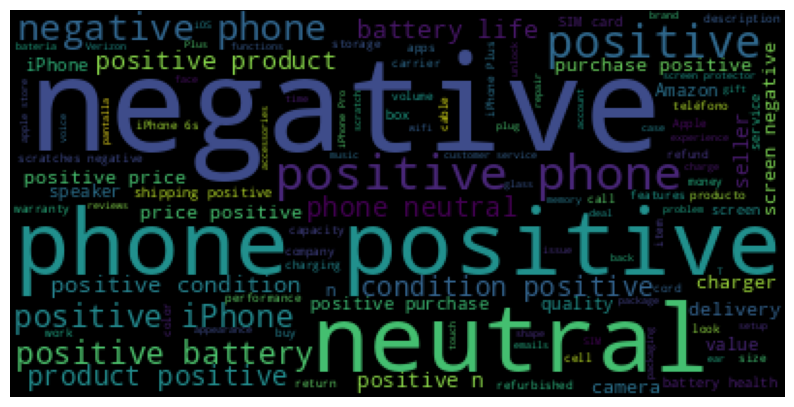

In [23]:
# Visualise the aspects in a word cloud
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(str(aspects)))
plt.axis("off")
plt.show()

`This word cloud is based on the aspects extracted from LLama3`